<center>
    
## <font color='maroon'>ASTR 20500</font>
## <font color='maroon'>Introduction to Python programming<br> with elements of astro statistics</font>
## <font color='maroon'>Inferring constraints on the linear model parameters using Bayesian approach</font>
</center>



### <font color='darkblue'>The Bayesian model parameter inference in the general form</font>

$$p({\rm model\vert data})=\frac{L({\rm data}\vert {\rm model})\,p({\rm model})}{p({\rm data})},$$

where $p({\rm model\vert data})$ is the posterior pdf for model parameters given data (measurements), $L({\rm data}\vert {\rm model})$ is the likelihood pdf of data given specific values of model parameters, and $\,p({\rm model})$ is the prior pdf for model parameters encapsulating our knowledge/expection of model parameter values before the considered measurements are taken into account. 


### <font color='darkblue'>The linear model</font>

Here we will consider a specific example of using the Bayes theorem to infer posterior pdf $p({\rm model\vert data})$ for the parameters of the linear model:

$$y = bx + c$$

using a set of $N$ measurements ${x_i}$, ${y_i}$ and their uncertainties (standard deviations) $\sigma_{x_i}$, $\sigma_{y_i}$. 

Such inference assumes that the linear model is a good description of the trend exhibited of these measurements (i.e., the tendency for $y_i$ to be proportionally larger for larger $x_i$ values. This assumption can be tested later by computing $\chi^2$ statistic and corresponding $p$-value for the model with its "best fit" parameters. 

Note that the measurements are not expected to follow the linear trend perfectly, but are expected to fluctuate around the line represented by $y=bx+c$ due their uncertainties, as you will see in the plots below. 

In addition to uncertainties in the measurements $\sigma_{x_i}$, $\sigma_{y_i}$ the model can allow for an *intrinsic scatter* that may exist for quantities $y$ and $x$ that are being measurements. This can arise if the quantities are correlated, but the correlation is not perfect. For example, people's weight is correlated with their height, but this correlation is not one-to-one perfect but has "scatter": a real range of weights at a given height. 

The model can allow for such intrinsic scatter via an additional assumption about the form of the scatter. Usually, the distribution of values of $y$ at a given $x$ is assumed to be Gaussian with the mean $bx + c$ and standard deviation $s$. 


### <font color='darkblue'>Example of the Bayesian approach: linear model parameter inference</font>


For data vectors $\vec{x}=\{x_i\}$, $\vec{y}=\{y_i\}$ and their uncertainties, which I'll group into array $d=\{\vec{x},\vec{y}, \vec{\sigma}_x, \vec{\sigma}_y\}$. 

We model distribution of data in the $x-y$ plane with the linear model $y_{\rm model}=bx_i +c + \sigma_{r,i}$, where $\sigma_{r,i}$ is the random number drawn from the Gaussian pdf with zero mean and standard deviation given by the effective uncertainty of the *residual* 

$$r_i=y_i-bx_i-c,$$ 

which by propagation of error is $\sigma_{r,i} = \sqrt{\sigma_y^2 + b^2\sigma_x^2 + s^2}$ (this assumes that uncertainties $\sigma_x$ and $\sigma_y$ are *uncorrelated*). This uncertainty consists of uncertainties of $x$ and $y$ and intrinsic scatter $s$ under assumption that intrinsic distribution of $y$ at a given $x$ is Gaussian with the standard deviation $s$. 

In the linear model $s$ can either be fixed or can be inferred from the measurements as the third model parameter (in addition to $b$ and $c$). 

The model defines the probability density function for a given single value of $y_i$, 

$$p(y_i\vert y_{\rm model})=p(y_i\vert b,c)={1\over \sqrt{2\pi \sigma^2_{r,i}}}\,\exp\left[-{1\over 2}\,\frac{r_i^2}{\sigma_{r,i}^2}\right]$$

and thus probability or *likelihood*  $p(y_i\vert b,c)dy$ that measured value $y_i$ is expected in the interval $[y_i,y_i+dy]$, given the model and its parameters. 

Here $dy$ is some small *constant* interval value and is not important. 

### <font color='darkblue'>The likelihood pdf for a series of measurements</font>

If we assume that different measurement pairs $(x_i,y_i)$ with different $i$ are independent, the likelihood pdf of all the measurements given the model and its parameter values is given by the product of individual probabilities: 

$$L({\rm data}\vert {\rm model}) = {\rm probability_{\rm y_0}}\times {\rm probability_{\rm y_1}}\,\ldots\,\times\,{\rm probability}_{y_{n-1}}$$

or: 

$$L({\rm data}\vert {\rm model}) = P(\vec{y}\vert b,c) = p(y_0\vert b,c)\,p(y_1\vert b,c)\,\ldots\, p(y_{n-1}\vert b,c)\,dy^n$$

or even more explicitly

$$L({\rm data}\vert b,c) = {1\over \sqrt{2\pi \sigma^2_{r,0}}}\,\exp\left[-{1\over 2}\,\frac{(y_0-y_{\rm model})^2}{\sigma_{r,0}^2}\right]\times \ldots\times {1\over \sqrt{2\pi \sigma^2_{r,n-1}}}\,\exp\left[-{1\over 2}\,\frac{(y_{n-1}-y_{\rm model})^2}{\sigma_{r,n-1}^2}\right]$$

by data in the expression above we imply ${\rm data}=\vec{x}, \vec{y}, \vec{\sigma}_x, \vec{\sigma}_y$. 


Given that the likelihood is a product of many Gaussian pdfs (each corresponding to a different measurement), it can become numerically very small and cause underflow of floating pont operations. For this reason, in the model inference we work with the the natural logarithms of pdfs, no the pdfs themselves, so that the Bayes theorem is

$$\ln p({\rm model\vert data})=\ln L({\rm data}\vert {\rm model})+ \ln p({\rm model})-\ln p({\rm data}),$$

Remembering that $\ln xy = \ln x + \ln y$ and $\ln x/y = \ln x - \ln y$.   

$\ln L$ for the linear model is given by  

$$\ln L({\rm data}\vert b,c) = \ln \left\{{1\over \sqrt{2\pi \sigma^2_{r,0}}}\,\exp\left[-{1\over 2}\,\frac{(y_0-y_{\rm model})^2}{\sigma_{r,0}^2}\right]\times \ldots\times {1\over \sqrt{2\pi \sigma^2_{r,n-1}}}\,\exp\left[-{1\over 2}\,\frac{(y_{n-1}-y_{\rm model})^2}{\sigma_{r,n-1}^2}\right]\right\}$$


First (taking into account that $\ln e^x = x\ln e=x$): 

$$\ln \left\{\frac{1}{\sqrt{2\pi} \sigma_{r,i}}\,\exp\left[-{1\over 2}\,\frac{(y_i-y_{\rm model})^2}{\sigma_{r,i}^2}\right]\right\}= \ln{1\over \sqrt{2\pi}} - \ln\sigma_{r,i}-{1\over 2}\,\frac{(y_0-y_{\rm model})^2}{\sigma_{r,i}^2}$$

$$\ln L({\rm data}\vert b,c) = n\ln{1\over \sqrt{2\pi}} - \sum\limits_{i=0}^{n-1}\ln\sigma_{r,i}-{1\over 2}\,\sum\limits_{i=0}^{n-1}\frac{(y_i-y_{\rm model})^2}{\sigma_{r,i}^2}=n\ln{1\over \sqrt{2\pi}} - {1\over 2} \,\sum\limits_{i=0}^{n-1}\ln\sigma_{r,i}^2-{1\over 2} \,\sum\limits_{i=0}^{n-1}\left(\frac{r_i}{\sigma_{r,i}}\right)^2,$$

where, again, $r_i=y_i-bx_i-c$ and $\sigma_{r,i} = \sqrt{\sigma_{y_i}^2 + b^2\sigma_{x_i}^2 + s^2}$

### <font color='darkblue'>Prior pdf for the linear model


If we have good reasons to think that slope and intercept should be within a given range, then priors corresponding to that range should be defined. However, if we don't really know what values to expect, then prior distributions can be inferred via the following considerations. 

 Slope $b$ is the tangent of the angle $\alpha$ ($b=\tan\alpha$) that the line of the linear model forms with $x$ axis. The slope thus varies from zero to infinity, and uniform prior in $b$ would thus assign a lot of probability to large $b$ values, which can bias inferred $b$ values high. 
    
 Most natural assumption for the prior pdf is thus that the angle $\alpha$ itself is uniformly distributed  $\alpha\in[-\pi/2,\pi/2]$: $p(\alpha)=1/\pi$.  Differential $db=d\alpha/\cos^2\alpha=d\alpha(1+b^2)$. Thus, uniform prior on $\alpha$ implies (using the condition of transformation of variables $p(\alpha)d\alpha=p(b)db$): 
 
$$p(b)=\frac{1}{\pi}\frac{1}{1+b^2}.$$
 

It is natural to assume uniform prior not in $c$, because $c$ depends on the particular choice of axis $y$, which will change if reference frame is rotated, but distance from the line to the origin $(x,y)=(0,0)$, $c_\perp=c\cos\alpha=c/\sqrt{1+b^2}$, which is invariant to rotation of the coordinate frame. Then $dc_\perp = dc/\sqrt{1+b^2}$ and uniform prior in $c_\perp$ implies 
$p(c_\perp)={\rm const}$ and using $p(c)dc = p(c_\perp)dc_\perp$ we get 

$$p(c)=\frac{{\rm const}}{\sqrt{1+b^2}},$$

where $C$ is normalization constant. If we define $c$ to be within a range $[c_{\rm min}, c_{\rm max}]$, the normalization of the pdf requires that 

$$\int\limits_{c_{\rm min}}^{c_{\rm max}} p(c) dc= \frac{C (c_{\rm max}-c_{\rm min})}{\sqrt{1+b^2}}=1$$

so that 

$$p(c) = \frac{1}{c_{\rm max}-c_{\rm min}}.$$

The prior pdf for the intrinsic scatter $s$ can be assumed to be uniform within some range $[s_{\rm min}, s_{\rm max}]$:

$$p(s) =\frac{1}{s_{\rm max}-s_{\rm min}},$$

so that the joint prior pdf for $b$, $c$, $s$ is

$$p(b,c,s)=p(b)p(c)p(s)=\frac{1}{(1+b^2)(c_{\rm max}-c_{\rm min})(s_{\rm max}-s_{\rm min})}.$$

or 

$$\ln p(b,c,s) = -\ln(1+b^2) -\ln(c_{\rm max}-c_{\rm min})-\ln(s_{\rm max}-s_{\rm min}).$$

In the last expression only the first term on the right hand side includes model parameter and will affect the functional form of the posterior pdf. The other two terms do not depend on parameters and thus will not affect the functional form of the posterior pdf. These terms can thus be neglected in the actual finding of the posterior maximum or credible intervals for model parameters. 

### <font color='darkblue'>Posterior pdf of the linear model</font>

The logarithm of the posterior pdf for the parameters $b$, $c$, and $s$ is thus given by 

$$\ln p(b,c,s\vert {\rm data})=\ln L({\rm data}\vert b,c,s)+ \ln p(b,c,s)-\ln p({\rm data}),$$

where $\ln p({\rm data})$ does not depend on model parameters and thus  will not affect the functional form of the posterior pdf and location of its maximum or credible regions of the parameters. This term is simply part of the normalization of $\ln p(b,c,s\vert {\rm data})$. 

The posterior pdf is usually mapped out numerically either by evaluating it for a grid of parameter values (straightforward for $\leq 3$ parameters of the linear regression), see below) or using sampling methods such as the Markov Chain Monte Carlo (MCMC) for larger numbers of parameters. MCMC method will be covered in ASTR 211. 


The maximum of $\ln p(b,c,s\vert {\rm data})$ can be found using one of the ***optimization methods*** or function minimization methods. 


The optimization methods themselves are outside the scope of this course and are covered in the ASTR 21100 course. Here an example of such minimization is given using SciPy's minimization function [<tt>scipy.optimize.minimize</tt>](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) for this purpose. 

### <font color='darkblue'>Putting it all together: inference of the linear model parameters</font>

Example below illustrates inference of the linear model parameters using a specific case of the linear relation between logarithm of a galaxy mass and logarithm of its rotation velocity. 

**Background.** Galaxies are large collections of gas and stars. Interstellar gas and stars in the "spiral" (aka "disk") galaxies like our Milky Way or [NGC 6384 galaxy](http://astrodvorek.cz/Pics/N6384_1n.jpg) rotates around the center with a velocity that is correlated with the total mass, $M$, of gas and stars in that galaxy. This relation is called the ["Tully-Fisher relation" (TFR)](https://en.wikipedia.org/wiki/Tully%E2%80%93Fisher_relation) in honor of the two astronomers, Brent Tully and Richard Fisher, who discovered it in 1977.   Our Sun, for example, is moving on a nearly circular orbit around the center of the Milky Way with the "***rotation velocity***" of $\approx 220$ km/sec. 

The relation can be approximated by the "power-law form": $M=a v_{\rm rot}^b.$ Such form becomes linear for the logarithms of the mass and rotation velocity: 

$$\log_{10} M = b\log_{10} v_{\rm rot} + \log_{10}a = b\log_{10} v_{\rm rot} + c,$$

and thus we can measure the slope $b$ and "*intercept*" $c$ of this relation using measurements for a sample of galaxies. 

In this example we will examine this correlation in the form of logarithms of the mass and logarithm of rotation velocity using modern measurements (from the paper by [Bradford et al. 2016](https://ui.adsabs.harvard.edu/abs/2016ApJ...832...11B/abstract)).

Measurement of the slope and its credible region is interesting because some models like the [Modified Newtonian Dynamics (MOND)](https://en.wikipedia.org/wiki/Modified_Newtonian_dynamics) model make predictions for what it should be. MOND, in particular, predicts that the slope of the linear relation is exactly $4$, while the constant $c$ in this model is predicted to be the fundamental constant of nature $c=-\log_{10} Ga_0$ where $G$ is the Newton's gravitational constant and $a_0$ is the universal acceleration assumed in that model. 

The code below reads in measurements $\log_{10} M$ and $v_{\rm rot}$ and prepares them for analysis. The mathematical framework outlined above is then used to derive credible regions for $b$ and $c$. The parameter $s$ in this case is fixed to be a constant, but could be made a parameter and constrained from the data. 


The final numbers for regression are put in variables $x=\log_{10} v_{\rm rot}$ and $y=\log_{10} M$  and  their uncertainties (standard deviations), $\sigma_y$ and $\sigma_x$. 


In [2]:
import numpy as np
from matplotlib import pylab as plt
from astropy.io import fits

url = 'http://astro.uchicago.edu/~andrey/classes/a205/data/bradford16_fig1.fits'
b16 = fits.getdata(url)

# width of the HI 21 cm line = proxy for rotation velocity in km/s
vrot = b16['VW20I']; 
# error of W20b
evrot = b16['VW20I_ERR']
# log of Vrot
x = np.log10(vrot)
# approximate log error
ex = 0.5*(np.log10(vrot+evrot) - np.log10(np.maximum(vrot-evrot,1.e-10)))

# log10 of the gas mass and star mass (aka the "baryons")
y = b16['MBARYON']; 
# error of log10(gas+stars mass)
ey = b16['MBARYON_ERR']

Instead of using the entire data set, we will select only a fraction of data points (every $n$-th one). By varying parameter <tt>nth</tt> below you can increase or decrease the sample and explore how results change with the number of data points.

In [3]:
nth = 5
x, y, ex, ey = x[::nth], y[::nth], ex[::nth], ey[::nth]

Code for the log of likelihood, log of prior pdf and their combination in the log posterior pdf. 

In [4]:
from scipy.optimize import minimize

def log_likelihood(params, *args):
    '''
    ln(likelihood pdf) 
    
    Parameters: 
    -----------
        params: numpy array or list with parameter values
                p[0] = slope b; p[1] = intercept c
        args: list of arguments: x, y, ex, ey - numpy arrays with data vectors
                                 and their uncertainties
                                 s - float, scatter in y- direction 
                                     about the mean linear relation
                                 
    Returns:
    --------
        ln(likelihood pdf): float
        
    '''
    b, c = params
    x, y, ex, ey, s = args
    sigr = np.sqrt(ey**2 + (b*ex)**2 + s**2)
    
    loglike = -np.sum(np.log(sigr) + ((y - b*x - c)/sigr)**2)
    return loglike 

def log_prior(params):
    '''
    ln(prior pdf) 
    
    Parameters: 
    -----------
        params: numpy array or list with parameter values
                p[0] = slope b; p[1] = intercept c
    
    Returns:
    --------
        ln(prior pdf): float
    '''
    b, c = params
    # this is an example how prior could be used to enforce a parameter to be within 
    # a given range, in this case [-100, 100]
    if c > -100 and c < 100:  
        logprior = -np.log(1+b**2) # prior value defined above
    else: 
        logprior = -1000 # ln(very small number = e^-1000 in this case)
    return logprior

def log_posterior(params, *args):
    '''
    ln(posterior pdf) 
    
    Parameters: 
    -----------
        params: numpy array or list with parameter values
                p[0] = slope b; p[1] = intercept c
        args: list of arguments: x, y, ex, ey - numpy arrays with data vectors
                                 and their uncertainties
                                 s - float, scatter in y- direction 
                                     about the mean linear relation
                                 
    Returns:
    --------
        ln(posterior pdf): float
        
    '''
    return log_likelihood(params, *args) + log_prior(params)

def minus_log_posterior(params, *args):
    '''
    -ln(posterior pdf) for minimization
    '''
    return -log_posterior(params, *args)

In [5]:
p0 = [3, 3] # initial guesses for parameter values
s = 0.25 # scatter in dex
res = minimize(minus_log_posterior, p0, args=(x,y,ex,ey,s), 
               method='nelder-mead', tol=1.e-9)
b, c = res.x

print('b = {:>.4g};  c = {:>.4g}'.format(b, c))

b = 3.33;  c = 2.995


In [25]:
likelihood = log_likelihood([b, c], x,y,ex,ey,s)
print(likelihood)

22.308803348066604


We can see that we get 2 numbers. Let's check that the model reasonably describes the data by plotting it. 

In [7]:
def plot_data_model(xr, yr, exr=None, eyr=None, bm=None, cm=None, 
                   btrue=None, ctrue=None, figsize=(5,5)):
    # plot data 
    plt.figure(figsize=figsize)
    if exr is not None and eyr is not None:
        plt.errorbar(xr, yr, xerr=exr, yerr=eyr, fmt='o', alpha=0.5, color='darkslateblue')
    else: 
        plt.plot(xr, yr, marker='o', alpha=0.5, color='darkslateblue')
    plt.xlabel(r'log10(Vrot [km/s])')
    plt.ylabel('log10(Mstars+Mgas)')
    xf = np.linspace(xr.min(), xr.max(), 10)
    if bm is not None and cm is not None: 
        plt.plot(xf, bm * xf + cm, '--', lw=3, c='lime', zorder=10000, label='regression model')
    if btrue is not None and ctrue is not None: 
        plt.plot(xf, btrue * xf + ctrue, '--', c='m', label='true model')
    plt.legend(loc='upper left', frameon=False)
    plt.show()



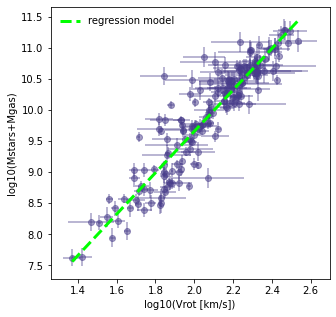

In [8]:
plot_data_model(x, y, ex, ey, bm=b, cm=c)

This looks pretty reasonable, but to really check whether this model is a good description of the data, we can compute the $\chi^2$ and reduced $\chi^2$ statistics for these "best fit" parameters. 

#### Applying $\chi^2$ goodness of fit test

In [9]:
from scipy.special import gammainc

def chi2_cdf(chi2, k):
    '''CDF of the chi^2 pdf
    Parameters: 
        chi2: float, value of the chi2 statistic
        k: float, the number of degrees of freedom
    '''
    return gammainc(k*0.5, chi2*0.5) 

def chi2_pvalue(chi2, k):
    chi2red = chi2 / k 

    if chi2red > 1: 
        pvalue = 1 - chi2_cdf(chi2, k) # use probability in the right tail P(>chi2)
    else:
        pvalue = chi2_cdf(chi2, k) # use probability in the left tail P(<chi2)
    return pvalue

In [10]:
chi2 = np.sum((y-b*x-c)**2/(ey**2 + (b*ex)**2))

k = y.size - 2 # N of degrees of freedom = number of data points - 2 model parameters 
chi2red = chi2 / k 
pvalue = chi2_pvalue(chi2, k)
print('reduced chi2 = {:.4f};  p-value = {:.3g}'.format(chi2red, pvalue))

reduced chi2 = 5.4677;  p-value = 0


We can see that reduced $\chi^2$ is well above 1 and for this many data points, the probability ($p$-value) of such large reduced $\chi^2$ is zero. 

The reason for this is that data has *intrinsic scatter* - i.e. scatter around the model line larger than uncertainties of individual data points. This can be because the quantities we are modelling do have real intrinsic scatter or because uncertainties of the measurements are underestimated for some reason. 

This intrinsic scatter needs to be accounted for in the model and $\chi^2$ but it was not accounted in the $\chi^2$ above. If not accounted in the model it can lead to biased slope estimate. 

This is easy to do, however, we just need to adjust the $\sigma_i$ used in the denominator to add scatter:

In [11]:
s = 0.25

chi2 = np.sum((y-b*x-c)**2/(s**2 + ey**2 + (b*ex)**2))

k = y.size - 2 # N of degrees of freedom = number of data points - 2 model parameters 
chi2red = chi2 / k 

if chi2red > 1: 
    pvalue = 1 - chi2_cdf(chi2, k) # use probability in the right tail P(>chi2)
else:
    pvalue = chi2_cdf(chi2, k) # use probability in the left tail P(<chi2)

print('reduced chi2 = {:.4f};  p-value = {:.3g}'.format(chi2red, pvalue))

reduced chi2 = 0.9876;  p-value = 0.466


We can see that with $s=0.2$ reduced $\chi^2$ is much closer to 1 and probability of the data being described by the model is also 2\% now. This is still pretty low, but we can now vary $s$ to see which value would bring reduced $\chi^2$ closest to 1 and maximize the p-value.

This is done below and the result is that $s\approx 0.23$ maximizes the $p$-value. 

In [12]:
s = 0.2
ds = 0.01
pbest = -10000
for i in range(10): 
    chi2 = np.sum((y-b*x-c)**2/(s**2 + ey**2 + (b*ex)**2))

    k = y.size - 2 # N of degrees of freedom = number of data points - 2 model parameters 
    chi2red = chi2 / k 
    pvalue = chi2_pvalue(chi2, k)
    if pvalue > pbest:
        pbest = pvalue
        sbest = s
    print('s = {:.4f}; reduced chi2 = {:.4f};  p-value = {:.3g}'.format(s, chi2red, pvalue))        
    s += ds


s = 0.2000; reduced chi2 = 1.3233;  p-value = 0.00217
s = 0.2100; reduced chi2 = 1.2436;  p-value = 0.0138
s = 0.2200; reduced chi2 = 1.1710;  p-value = 0.056
s = 0.2300; reduced chi2 = 1.1045;  p-value = 0.158
s = 0.2400; reduced chi2 = 1.0436;  p-value = 0.328
s = 0.2500; reduced chi2 = 0.9876;  p-value = 0.466
s = 0.2600; reduced chi2 = 0.9360;  p-value = 0.277
s = 0.2700; reduced chi2 = 0.8884;  p-value = 0.141
s = 0.2800; reduced chi2 = 0.8444;  p-value = 0.0615
s = 0.2900; reduced chi2 = 0.8036;  p-value = 0.0234


This is a rather crude way of doing this and is not quite consistent with the Bayesian approach because $s$ value here is obtained by maximizing the likelihood pdf, not posterior pdf. 

In the Bayesian pdf, $s$ needs to be included as a parameter in the likelihood and prior pdfs and its constraints obtained along with $b$ and $c$ by finding the combination that maximizes posterior pdf.  

#### Credible regions for the slope and intercept

What are the uncertainties of the slope and intercept? To figure this out, we need to "map out" posterior pdf in the $b-c$ plane and numerically estimate the areas (contours) in the distribution that contain a given fraction of the total probability to get confidence intervals, which in Bayesian approach are called *credible regions* of a parameter. 

In the example below, the likelihood for the linear model (2 parameters) is tabulated on a 2-dimensional grid of values of $b$ and $c$. The sum of likelihood values on this grid represents an approximation for the integral over the likelihood. 

In [13]:
# a very simple/approximate numerical integration:
nbg, ncg = 300, 300 # define the number of grid points in b and c

# to get unbiased results the range should be large enough to encompass nearly all probability
# so at the edges of this interval posterior pdf should be very small
bmin, bmax = 2.6, 4. # define range (min and max) of b values to map
cmin, cmax = 2.0, 4.0 # define range (min and max) of c values to map
bg = np.linspace(bmin, bmax, nbg) # create a vector of evenly spaced nbg values of b
cg = np.linspace(cmin, cmax, ncg) # create a vector of evenly spaced ncg values of c

pgrid = np.zeros((nbg,ncg)) # initialize 2D array to hold 2d grid of posterior pdf values
s = 0.25 # assumed scatter value

# cycle through every grid point and compute and record ln(posterior pdf) 
for i, bd in enumerate(bg):
    for j, cd in enumerate(cg):
        pgrid[i,j] = log_posterior([bd, cd], x, y, ex, ey, s)

In [14]:
pgrid = np.exp(pgrid) # convert ln(posterior) to posterior; e^ln x = x 
norm_factor = np.sum(pgrid) # total probability within the range of the grid
pgrid = np.maximum(1.e-300, pgrid / norm_factor) # normalize posterior so it sums up to 1

In [15]:
print(pgrid)

[[1.00000000e-300 1.00000000e-300 1.00000000e-300 ... 2.76713677e-253
  1.97792118e-247 1.18268447e-241]
 [1.00000000e-300 1.00000000e-300 1.00000000e-300 ... 1.92840963e-244
  1.05999952e-238 4.87445861e-233]
 [1.00000000e-300 1.00000000e-300 1.00000000e-300 ... 9.07763320e-236
  3.83800239e-230 1.35764101e-224]
 ...
 [2.59704182e-122 4.64630231e-126 7.09330142e-130 ... 1.00000000e-300
  1.00000000e-300 1.00000000e-300]
 [6.12391752e-128 8.75380177e-132 1.06782987e-135 ... 1.00000000e-300
  1.00000000e-300 1.00000000e-300]
 [1.04713486e-133 1.19613859e-137 1.16606805e-141 ... 1.00000000e-300
  1.00000000e-300 1.00000000e-300]]


In [16]:
def get_xpfrac(x, pcum, pfrac):
    '''
    Given an numpy array x and corresponding cumulative probability for each element P(<x)
    give the value of x element that corresponds to a given value of P(<x) = pfrac
    
    Returns: 
    
        value of x corresponding to P(<x) = pfrac
    '''
    inds = (pcum < pfrac)
    xd = x[inds]
    return xd[-1]

def grid_stats(pgrid, xg, yg, axis=0, argname='b'):
    '''
    Compute statistics given the grid of pdf values for two parameter grids xg, yg
    
    The code below uses numpy operations to find the grid cell with the largest pdf value
    (which corresponds to "best fit" parameter values)
    
    '''
    # marginalize probability along input axis
    pmarg = np.sum(pgrid, axis=axis) # total probability along one axis
    # index where maximum probability is within a column or row of pgrid
    imax = np.argwhere(pmarg==pmarg.max())[0][0] 
    if axis: pg = xg 
    else: pg = yg
    # cumulative probability distribution along axis 
    pcum = np.cumsum(pmarg) / np.sum(pmarg)
    
    pmax = pg[imax] # maximum pdf value
    # get values of pg where P(<pg) = to the last argument
    p025, p975 = get_xpfrac(pg, pcum, 0.025), get_xpfrac(pg, pcum, 0.975)
    p341, p657 = get_xpfrac(pg, pcum, 0.1573), get_xpfrac(pg, pcum,0.8427)

    print('max. probability at {} = {:.4g}'.format(argname, pmax))
    print('68.27% credible region for {}: {:.4g} - {:.4g}'.format(argname, p341, p657))
    print('95% credible region for {}: {:.4g} - {:.4g}'.format(argname, p025, p975))
    return pmax, p341, p657, p025, p975

Estimate 68.3% and 95% credible regions for the slope and intercept. 

In [17]:
bmax, bcl68min, bcl68max, bcl95min, bcl95max = grid_stats(pgrid, bg, cg, 
                                                          axis=1, argname='b')
cmax, ccl68min, ccl68max, ccl95min, ccl95max = grid_stats(pgrid, bg, cg, 
                                                          axis=0, argname='c')

max. probability at b = 3.33
68.27% credible region for b: 3.256 - 3.396
95% credible region for b: 3.195 - 3.462
max. probability at c = 2.997
68.27% credible region for c: 2.843 - 3.13
95% credible region for c: 2.709 - 3.264


Now let's plot marginalized posterior pdfs for $b$ and $c$. Marginalized pdfs are defined as 

$p(b\vert{\rm data}) = \int p(b,c\vert{\rm data})dc$ or $p(c\vert{\rm data}) = \int p(b,c\vert{\rm data}) db$. For a gridded 2-parameter pdf we perform integration approximately by simply summing up values along a given row or column. 

In [26]:
def plot_bc_posteriors(pgrid, bg, cg, figsize=(10,5)):
    '''
    Plot marginalized posterior pdfs of the slope b and intercept c
    
    pgrid is a 2d grid of posterior pdf values evaluated for evenly spaced grid
    of b and c, which is contained in the bg and cg numpy 1d arrays
    
    Computes 68.27 and 95% credible regions for marginalized posteriors and plots them
    as shaded regions along with the posterior pdf itself (line)
    '''
    
    bmarg = np.sum(pgrid, axis=1) # marginalize over c
    cmarg = np.sum(pgrid, axis=0) # marginalize over b
    
    # get credible regions for 2d grid for these marginalized distributions
    bmax, bcl68min, bcl68max, bcl95min, bcl95max = grid_stats(pgrid, bg, cg, axis=1, 
                                                              argname='b')
    cmax, ccl68min, ccl68max, ccl95min, ccl95max = grid_stats(pgrid, bg, cg, axis=0, 
                                                              argname='c')
    # plot "marginalized" likelihoods for slope b and intercept c
    fig_kw={'figsize': figsize}
    # multipanel figure with 1 row and 2 panels
    fig, ax = plt.subplots(nrows=1, ncols=2, sharex='col', sharey='row', **fig_kw)
    # first plot slope b posterior
    ax[0].set_xlabel('slope b')
    ax[0].set_ylabel('posterior pdf')
    # find elements of bg that are within credible region
    i95 = (bg > bcl95min) & (bg<=bcl95max)
    ax[0].fill_between(bg[i95], bmarg[i95], color='slateblue', alpha=0.5, label='95% cl')
    i68 = (bg > bcl68min) & (bg<=bcl68max)
    ax[0].fill_between(bg[i68], bmarg[i68], color='slateblue', alpha=0.75, label='68.27% cl')
    ax[0].plot(bg, bmarg, c='darkslateblue', lw=3)
    ax[0].legend(loc='upper left', fontsize=12)
    ax[0].grid(ls=':', c='gray')
    # now plot intercept c posterior
    ax[1].set_xlabel('intercept c')
    i95 = (cg > ccl95min) & (cg<=ccl95max)
    ax[1].fill_between(cg[i95], cmarg[i95], color='slateblue', alpha=0.5)
    i68 = (cg > ccl68min) & (cg<=ccl68max)
    ax[1].fill_between(cg[i68], cmarg[i68], color='slateblue', alpha=0.75)
    ax[1].plot(cg, cmarg, c='darkslateblue', lw=3)
    ax[1].grid(ls=':', c='gray')
    plt.show()

max. probability at b = 3.33
68.27% credible region for b: 3.256 - 3.396
95% credible region for b: 3.195 - 3.462
max. probability at c = 2.997
68.27% credible region for c: 2.843 - 3.13
95% credible region for c: 2.709 - 3.264


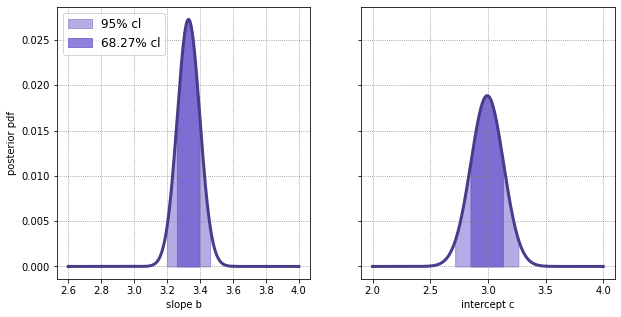

In [27]:
plot_bc_posteriors(pgrid, bg, cg)

We can also plot posterior pdf in 2d in the plane of $b$ and $c$ as a colored image, where colors reflects the posterior pdf value, along with contours enclosing 68.3%, 95.5%, and 99.7% of the total probability within the region, which are usually called the 1-$\sigma$, 2-$\sigma$, and 3-$\sigma$ contours. 

In [20]:
from scipy.optimize import brentq

def conf_interval(x, pdf, conf_level):
    """
    helper function for numerical solution of the confidence level
    fine x value in the pdf array that corresponds to contour enclosing
    the fraction of total probability corresponding to conf_level
    """
    return np.sum(pdf[pdf > x])-conf_level

# define confidence levels - the fractions of total probability for which we want
# to define contours 
conflevs = [0.6827, 0.9545, 0.9973]
levs = []

for cl in conflevs:      
    sig = brentq(conf_interval, 0., 1., args=(pgrid, cl) )   
    levs.append(sig)


In [21]:
from matplotlib import cm

def plot_color_map(x, y, data, xlim=[0.,1], ylim=[0.,1.], 
                   xlabel = ' ', ylabel = ' ', cmap='winter', colorbar=None, 
                   levels = [], contcmap = 'Reds',
                   plot_title=None, figsize=3.0, figsave=None):
    '''
    Generic helper function for plotting values in 2d array data gridded at evenly 
    spaced x and y values passed in the vectors in the first 2 arguments. 
    The other arguments control plotting with matplotlib
    '''
    
    fig, ax = plt.subplots(figsize=(figsize,figsize))
    ax.axis([xlim[0], xlim[1], ylim[0], ylim[1]])

    plt.xlabel(xlabel); plt.ylabel(ylabel)
    cmap = cm.get_cmap(cmap)
    im = ax.pcolormesh(x, y, data, cmap=cmap, shading='auto', rasterized=False)
    if levels:
        ax.contour(x, y, data, levels=levels, cmap=contcmap)
    if colorbar: 
        fig.colorbar(im, ax=ax)
    if plot_title:
        plt.title(plot_title, fontsize=3.*figsize)

    if figsave:
        plt.savefig(figsave, bbox_inches='tight')
    plt.show()


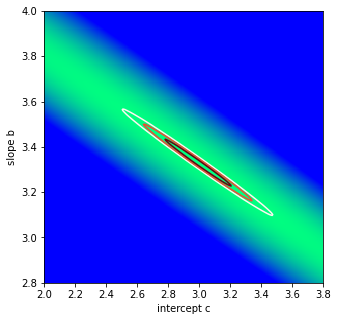

In [22]:
# plot ln(Likelihood) and 1-, 2-, and 3-sigma 2d contours
plot_color_map(cg, bg, np.log(pgrid), ylabel='slope b', xlabel='intercept c',
               ylim=[2.8,4], xlim=[2.,3.8], levels = sorted(np.log(levs)), figsize=5) 

The Bayesian analysis presented so far is the best way to derive constraints on the $b$ and $c$ of the linear model given measurements. 

Below these results are compared ot the least squares linear regression frequently used to estimate the slope and intercept of the linear model. 

### <font color='darkblue'>Comparison to simple least squares linear regression </font>

A class below implements the simple least squares estimates for the slope and intercept. 
The least squares method of linear regression is described in [10b_lsq_linear_regression](https://drive.google.com/file/d/1zjFGj5LS3K5K14D-t_ck9dQNlNh7lP4E/view?usp=sharing) notebook. 


In [23]:
class LSQ_Regression:
    '''
    Simple (unweighted) least squares regression of data vectors x and y
    '''
    def __init__(self, x=None, y=None):
        self.x = x
        self.y = y
        self.b, self.c = self.slope_and_intercept(x=x, y=y)
            
    def slope_and_intercept(self, x=None, y=None):
        '''
        Estimate slope and intercept using least squares regression
        '''
        if x is None or y is None:
            if self.x is None or self.y is None: 
                raise ValueError("LSQ_Regression error: x or y are not defined!")   
            x, y = self.x, self.y
        nx = len(x)
        assert(nx == len(y)) # this will catch seqiences with unequal size and generate error
        xm = np.mean(x)
        ym = np.mean(y)
        self.b = np.sum((x - xm)*(y - ym)) / (nx-1) / np.var(x, ddof=1)
        self.c = ym - self.b * xm
        return self.b, self.c
        
    def print_slope_and_intercept(self, b=None, c=None):
        '''
        print slope and intercept values 
        '''
        if b is None or c is None: 
            print('b = {:>.4g};  c = {:>.4g}'.format(self.b, self.c))
        else:
            print('b = {:>.4g};  c = {:>.4g}'.format(b, c))
            

Let's apply it to the same data

In [24]:
lsq = LSQ_Regression(x=x, y=y)

lsq.print_slope_and_intercept() 

b = 3.241;  c = 3.194


We can see that the slope and intercept are close to the Bayesian values, but at the same time, not quite the same. Intercept in particular is at the edge of the 95% credible region. 

This is not too surprising because we obtained these estimates of $b$ and $c$ without accounting for the uncertainties in the measurements. So all data points are affecting the slope and intercept equally, while in the Bayesian method data points with larger uncertainties affect $b$ and $c$ constraints less. 

At the same time, there is no uncertainty associated with it. In principle, such uncertainty can be estimated using the [bootstrap method](https://drive.google.com/file/d/1bqxwc7iDOmvHnypWXCWFZ33LYq1hJHls/view?usp=sharing). However, there would still be no way to incorporate. 

Overall, simpler methods like linear least squares regression or maximum likelihood will give results similar to the Bayesian method when there is lots of measurements and uncertainties and scatter in the data are Gaussian. This is because when measurements are constraining, effects of the prior pdf on the posterior pdf are small and posterior is approximately equal to the likelihood. 

However, when data is not very constraining, the results can be quite different, as you saw in the example with a single measurement of the wait time. 

### <font color='darkblue'>Possible exercises: </font>

* Vary the number of data points using nth parameter in the cell after the cell where data is read and explore how constraints on $b$ and $c$ change by re-running analysis. 

* Run the $b$ and $c$ analysis with $s=0$ - how much does the slope and intercept change? Why do you think they change? Plot the model line over data using example code above and see if the $b$ and $c$ values obtained this way are a better description of data. 



### <font color='darkblue'>Error propagation to estimate $\sigma_r$ (optional)</font>

If we are measuring a quantity $r$ that is a function of $x$ and $y$, $r=f(x,y)$, the standard deviation of $r$  is by definition:

$$\sigma_r^2=\lim\limits_{n\rightarrow\infty}\left[{1\over n-1}\,\sum\limits_{i=0}^{n-1}(r_i-\bar{r})^2\right] $$


Using Taylor expansion of $r_i$ around $\bar{r}$ 

$$r_i\approx \bar{r} + (x_i-\bar{x})\,{\partial f\over\partial x}\vert_{x=\bar{x}} + (y_i-\bar{y})\,{\partial f\over\partial y}\vert_{y=\bar{y}} +\ldots$$ 

Substituting $r_i-\bar{r}$ from the Taylor expansion into the expression for $\sigma_r^2$ above we get.

$$\sigma_r^2=\lim\limits_{n\rightarrow\infty}{1\over n-1}\,\sum\limits_{i=0}^{n-1}\left[(x_i-\bar{x})\,{\partial f\over\partial x} + (y_i-\bar{y})\,{\partial f\over\partial y} +\ldots\right]^2$$

or 
$$\sigma_r^2=\lim\limits_{n\rightarrow\infty}{1\over n-1}\,\sum\limits_{i=0}^{n-1}\left[(x_i-\bar{x})^2\,\left({\partial f\over\partial x}\right)^2+(y_i-\bar{y})^2\,\left({\partial f\over\partial y}\right)^2+2(x_i-\bar{x})(y_i-\bar{y})\,{\partial f\over\partial x}{\partial f\over\partial y}+\ldots\right]  $$

Partial derivatives here are evaluated at $\bar{x}$ and $\bar{y}$ and are just constants and so can be taken outside the sums. The limits taken for the sums, on the other hand, are the familiar variances and covariance: 

$$\sigma_x^2 = \lim\limits_{n\rightarrow\infty}{1\over n-1}\,\sum\limits_{i=0}^{n-1}(x_i-\bar{x})^2;\ \ \ \ \ \
\sigma_y^2 = \lim\limits_{n\rightarrow\infty}{1\over n-1}\,\sum\limits_{i=0}^{n-1}(y_i-\bar{y})^2$$

$$\sigma^2_{xy} = \lim\limits_{n\rightarrow\infty}{1\over n-1}\,\sum\limits_{i=0}^{n-1}(x_i-\bar{x})(y_i-\bar{y}).$$

### <font color='darkblue'>The error propagation equation</font>

With this the error propagation equation is for $r=f(x,y)$: 

$$\sigma_r^2= \left({\partial f\over\partial x}\right)^2\sigma^2_x + \left({\partial f\over\partial y}\right)^2\sigma^2_y +2{\partial f\over\partial x}{\partial f\over\partial y}\sigma^2_{xy}+\ldots $$

Also, if $f$ is a linear function of $x$ and $y$, as is the case here, $r_y = y - b_{yx}x - c_{yx}$, all other terms hidden in $+\ldots$ are zero. 

Thus, the uncertainty of $r_y = y - b_{yx}x - c_{yx}$ is 

$$\sigma_{r_y}^2 = \sigma_y^2 - 2b_{yx}\sigma^2_{xy} + b^2_{yx}\sigma_x^2.$$

If we don't have estimate of the covariance $\sigma^2_{xy}$, as is the case here, we must assume that it is zero, and the residual uncertainty is 

$$\sigma_{r_y} = \sqrt{\sigma_y^2 + b^2_{yx}\sigma_x^2}$$

Note that result of the error propagation has a simple geometric interpretation in the case of the linear model, if we consider the right triangle with $\sigma_x$ as its base. Then $b_{yx}$ is the tangent of the angle formed by the hypotenuse and $\sigma_x$, and the magnitude of fluctuations in the $y$-direction due to fluctuations of $x$ is given by $b_{yx}\sigma_x$. 

The total variance in $y$ direction is then $\sigma_y^2 + (b_{yx}\sigma_x)^2$. 